# How to do SVM Learning for Breast Cancer Diagnostics 
## Introduction
Cancer is one of the Diseases which has a huge impact on  patients and their families, so understanding how artificial intelligence can be leveraged to aid diagnosis is important in order to help find ways to alleviate the prevalence of this disease.  This paper outlines how machine learning driven AI can be used to aid diagnosis of cancer by building a model that assesses visual input features of cell nuclei. It also serves as a useful example students of AI to understand the dynamics machine learning algorithms and to  understand how to  assess their performance.

Breast cancer is one of the most commonly occurring cancers, with over 2 million new cases diagnosed globally every year (Vos 2015). While around 5% to 10% of cases are due to inherited genes, such as variants of BRCA (King 2003), there is higher risk for developing this form of cancer linked to lifestyle factors such as alcohol consumption and obesity (Morimoto 2003). For example, women who were overweight and obese had an increased invasive breast cancer risk vs women of normal weight (Neuhouser 2015). However the major risks associated with this disease are age, due to likelihood of mutations caused by cell division and gender, as breast cancer mainly affects women. 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e7/Mammo_breast_cancer_wArrows.jpg" alt="Mammograms showing a normal breast (left) and a breast with cancer (right, white arrows)">
<center>Figure 1: Mammograms showing a normal breast (left) and a breast with cancer (right, white arrows).</center>

Breast cancer frequently occurs in the cells lining the milk ducts, known as ductal carcinomas, and the tissue that  produces the milk supplied to these ductal carcinomas, known as lobular carcinomas (NCI 2014). Therefore diagnosing such carcinomas involves taking a biopsy of cells from the site in question, which may be deep within the breast tissue. Early diagnosis is key to the effective treatment of such cancers, as studies have shown a increases in cancer survival due to advances in early detection and treatment (Miller 2016), so performing an effective assessment is critical.  Mammograms are frequently used as a screening method along with physical examination to touch to determine if there is a need for further investigation. Suspect tissue is that often biopsied using a fine needle aspiration, whereby a narrow hollow needle is inserted into the tissue to collect a sample of cells (Wu 2004). 

These cells are then prepared for examination by a pathologist who examines the characteristics of individual cells, as many different cell features are thought be highly correlated with malignancy (Street 1993). It is possible to use machine vision to detect such cell features from biopsies via a digital microscope. This is the basis of the famous Wisconsin breast cancer dataset whereby 569 biopsies were collected along with the mean, max and standard error for the following ten geometric features for cells in the sample (Street 2018):

<img src = "./images/Cells.png" style="width:50%">

<center>Figure 2: Image capture of cell features of invasive ductal carcinoma.</center>


1. The radius of an individual nucleus.
2. The perimeter of the cell nucleus.
3. The area of the cell nucleus.
4. The perimeter and area are combined to give a measure of the compactness of the cell nuclei using the formula:
  
 \begin{align}
compactness & = perimeter^2 area 
\end{align}

    Cell nuclei that have an irregular shape will have a higher measure of compactness. 
5. The smoothness as measured by the difference between the radii across the cell nucleus.
6. The number and severity of concave features around the cell nucleus.
7. The number of concave points around the cell nucleus.
8. A measure of symmetry, sampled at points around the cell nucleus.
9. A measure of the fractal dimension along the cell.
10. The texture of the cell nucleus by measuring the grayscale intensity variation across pixels within the cell nucleus.

Malignant cells tend to be irregular compared to normal cells, so larger values for  features related to shape, such as symmetry, fractal and concavity  tend to indicate that the cells are cancerous. The mean, max and standard error of each feature are computed for each image to give a total of 30 input features per sample.

## Machine Learning Approach
Machine learning is a computational approach to AI that uses algorithms that iterate over datasets to build statistical models (Samuel 1959). Machine learning techniques can be broadly classified as supervised, which uses labelled input data to train a model, or unsupervised algorithms that cluster data into related groups. 
The power of machine learning is the ability to generalise by correctly classifying unseen data, based on models build using training data. Machine leanring is a powerfull tool, so before we jump in and start crunching data we should put a process in place to make sure that we have a usful outcome. A popular process is the Cross-industry standard process for data mining, known as CRISP-DM (Shearer 2000).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/440px-CRISP-DM_Process_Diagram.png" alt="Process diagram showing the relationship between the different phases of CRISP-DM">
<center>Figure 2: Process diagram showing the relationship between the different phases of CRISP-DM (Wikipedia).</center>

### Business Understanding
This first step is focussed on gaining an understanding on the need for the machine learning project business perspective, which in this case is cancer care. What we would like is an accurate and precise diagnostic for patients, while adhering to the Hippocratic Oath that is historically taken by physicians. It requires a new physician to swear to uphold specific ethical standards. The Oath is the earliest expression of medical ethics in the Western world, establishing several principles of medical ethics which remain of paramount significance today. *"I will use treatment to help the sick according to my ability and judgment, but never with a view to injury and wrong-doing. Neither will I administer a poison to anybody when asked to do so, nor will I suggest such a course."*
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Hippocrates.jpg/440px-Hippocrates.jpg" alt="Hippocrates." style="width:50%">
<center>Figure 4: Hippocrates (Wikipedia).</center>

With this in mind our key busniness requirments for the case of cancer diagnosis are to make sure that patients have a reliable result. In practicale terms we want to be 100% certian that patients that have a malignant tumor get a positive cancer diagnosis and those the have a benign tumor get a negative result. We want to make sure that we done not give patients and their physicians misleading information. In particular we want to avoidn giving a patient witha malignant tumor an all clear result as they would miss valuable treatment. In formal medical diagnositc terms we want to have a test with high specifivity and high sensitivity:

* A dignostic with high sensitivity will classify correctly those **with** the disease (true positive rate)
* A dignostic with high specificity will classify correctly those **without** the disease (true negative rate)

It is confusing to remember these terms, so I use the mnemonic *"Be **sensitive** to those **with** disease and **specific**ally rule  those healthy **without**."*

In the WBCD X have malignant breast cancer and Y do not, so consider the following scenarios:
Our technology is excellent and our diagnostic states that X have the disease and Y do not, so the sensitivity is 100% and the specificity is 100%.
Our technology is found wanting and our diagnostic states that X have the disease and Y do not, so the sensitivity is 100% and the specificity is 100%.

If 100 patients known to have a disease were tested, and 43 test positive, then the test has 43% sensitivity. If 100 with no disease are tested and 96 return a negative result, then the test has 96% specificity. 

Cancer is a disiease where treatment can benfit from early detection so we would also like to have a reult in a timely manner.  Healthcare is also notoriously expensive so we also want to make this test practical and affordable. **Could add in reproducibility, **

In summary our busnies understanding for this project is to provide a diagnistic reults with:
* High sensitivty  
* High specitivity
* Low cost 
* Fast processing

### Data Understanding
In this step we need to gather the data and explore its features and properties and get insight into what it represents. In exploring it we can also identify any outliers, quality issues and search for defining features that my help us in correctly classifying the data.
So let's start with locating the data and importining into our environemt. The data is avilable from UCI and is also included with this solution in the \data\breast-cancer-wisconsin-data folder, under the filename "data.csv". 
In order to ensure that we have downloaded the file correctly we can search our current working directory:

In [3]:
import os
print(os.getcwd())
%ls data\breast-cancer-wisconsin-data\*.csv

C:\Users\paulw\Dropbox\0 Current Work\Data Analytics 2019\labs-2019
 Volume in drive C is Windows
 Volume Serial Number is 44EC-5869

 Directory of C:\Users\paulw\Dropbox\0 Current Work\Data Analytics 2019\labs-2019\data\breast-cancer-wisconsin-data

25/09/2016  10:49           125,204 data.csv
               1 File(s)        125,204 bytes
               0 Dir(s)  57,749,852,160 bytes free


The file is there, so we can now read in the file contents into a DataFrame data structure provided by the Panda library, which  offers data structures and operation for manipulating data:

In [5]:
# Import Pandas data manpulation library
import pandas as pd    
# Read the comma seperated values file into a Pandas dataframe object
df = pd.read_csv('./data/breast-cancer-wisconsin-data/data.csv')

We can now get our first look at the data, so let's check out how many rows and columns we have.

In [6]:
#Print out the first 5 rows
df.shape

(569, 33)

We seem to have a decent amount of data as we have 569 rows and 33 columns. Now let's see some actual data by listing the first 5 rows.

In [7]:
#Print out the first 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df._get_numeric_data().head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


This first snippet shows that we have data that matches the description of the WBCD dataset. However there is a lot of data, so let's see if we are missing any values. We can do this via the isnull dataframe method, which will tell us if the datframe contains and null (empty) of not a number (NaN) entries:

In [9]:
# Check for any null NaN values
df.isnull().values.any()

True

This returns true, and on inspection, there is indeed a whole colummn of NaN values, called "Unnamed 32". This do not server any purpose for our requirements, so we can remove this column. So let's see if there are any other potential issues with the data, bearing in mind that we are look ing for good numerical data that will allow us build a ML model that can correctly classify data. So let's use some code to see if there are any non-numerics colums in our data set:

In [10]:
#List all non-floating point columns in the data frame.
df.select_dtypes(exclude=['float']).head()

,id,diagnosis
0,842302,M
1,842517,M
2,84300903,M
3,84348301,M
4,84358402,M


This returns two columns: id and diagnosis. The ID column is label data that is used to track the cell tissue samples from the patients and is not needed to aid our analysis and so can be removed from the data set. So let's drop that along with the Unnamed 32 column.

In [11]:
# Drop the 'Unnamed 32' and id column
df = df.drop(['id', 'Unnamed: 32'], axis=1)

This 'diagnosis' column is <a href="https://en.wikipedia.org/wiki/Categorical_variable">categorical</a> data and as described in the data desription docmentation it consists of just two values: 'B' for benign and 'M' for malignant. 
This feature column can be used for training a machine learning model, so we will decide how to handle this at a later stage. For now let's see how the diagnosis data is distributed.

In [12]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
categories, category_counts = np.unique(df.values[:,0], return_counts=True)
#print(categories)
#print(category_counts)
colors = ['orange', 'lightgreen']
#plt.figure(figsize=(8,5))
plt.pie(category_counts, labels=categories, explode=(0.05,0), colors=colors,
       autopct='%1.0f%%', shadow=True,);

This shows that nearly two-thirds of the cancer tissue samples are for benign tumours and the remaining third are for malignant tumors.  This is useful information as it may have an impact an analysis at a later stage.  
It would also be useful to analyse the input feature data set and we can do this by getting summary descriptive statistics and by creating box plots of the various features. Recall that the the mean, worst and standard error values are tracked for each of the cells features, so let's get summary stats and plot each of these in box plots to get a sense of the data.

In [13]:
#Get a summary statistical summary of the data using the Dataframe describe command
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


This statistcal summary is useful, but is a bit hard to digest, so I prefer to include the box plots below in order to visually inspect the data.

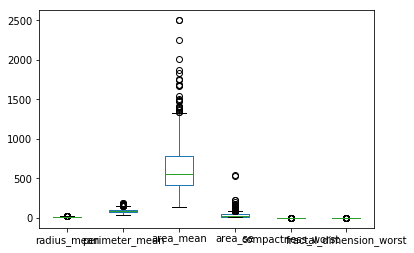

In [14]:
# Box plot of sample WBCD features
#plt.boxplot(df.iloc[:,['radius_mean','perimeter_mean','area_mean', 'area_se']]); #, figsize=(16,8));
# Box plot first 10 floating point WBCD features
df.loc[:,['radius_mean','perimeter_mean','area_mean', 'area_se','compactness_worst','fractal_dimension_worst']].plot.box(return_type='axes');
# Box plot first 10 floating point WBCD features
#df.iloc[:,1:10].plot.box(return_type='axes');
#df.iloc[:,11:20].plot.box(return_type='axes', figsize=(16,8));
#df.iloc[:,21:30].plot.box(return_type='axes', figsize=(16,8));

What jumps out here is the fact that the range of values across the data set varies significantly with the area_mean, area_worst and area_se having a much wider range of values. For example radius_mean has a minimum value of 6.981 and maximum value of 28.11, compared with area_mean, which has a minumum value of 143.5 and a maximum value of 2501. This will skew later analysis and can be corrected by standardising the values between 0 and 1. 

Next we should examine which of these features are correlated. We can do this using a PairGrid plot from the Seaborne library, colouring each point according to diagnosis. These plot allow us to examine if there is any pattern or correlation between the features. The plot below show a pair wise comparison of the the first ten features. A colour coded histogram is also shown for each feature. From this we can see that symmetry_mean has many overlapping values so it would be difficult to seperate benign and malignat samples using this features.However, radius_mean values are more clearly seperated so this may be using for distinguising diagnosis. This code can be altered to view the realatinship between the other features.

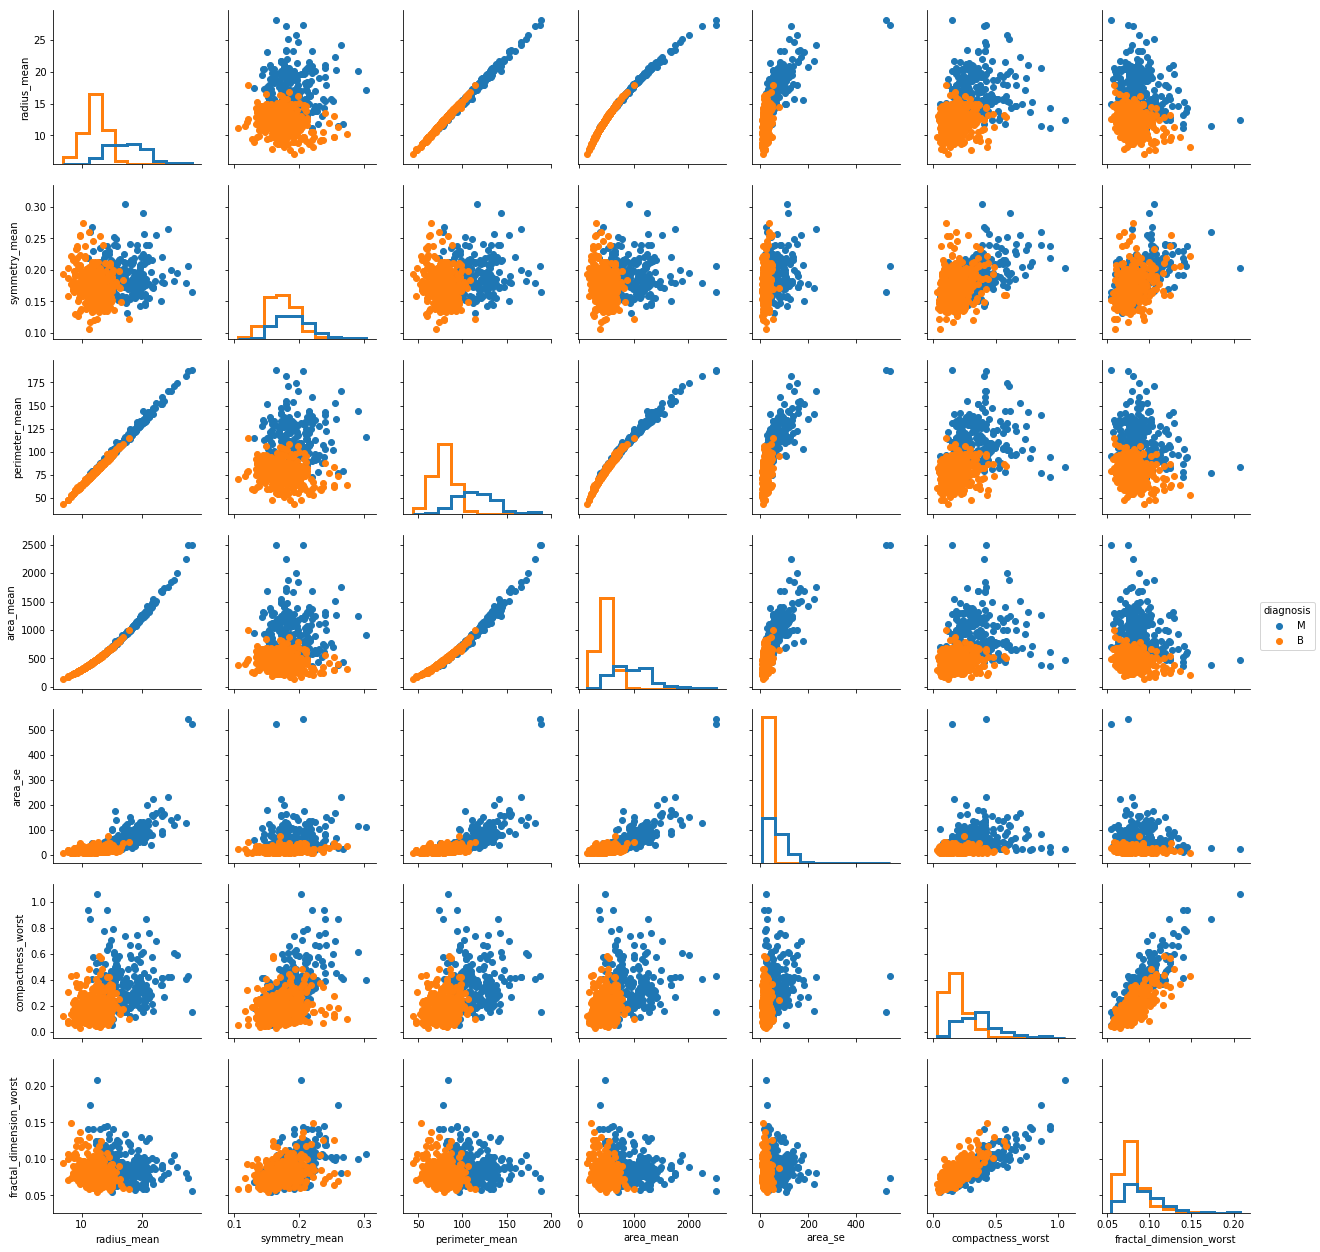

In [15]:
import seaborn as sns
g = sns.PairGrid(df.loc[:, ['radius_mean','symmetry_mean','perimeter_mean','area_mean', 'area_se','compactness_worst','fractal_dimension_worst','diagnosis']], hue="diagnosis")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show();

Visualising all 30 features will be difficult, so an easy way to find features that could serve as distinct markers is to do a pairwise correlation across the data set. The following listing provides us with the top 10 highly correlated input features And intuitively it makes sense that features such as perimeter and radius would be highly correlated as there is a strong link between the perimeter of a cell and its radius. Therefore would make sense in building a machine learning model to drop one of these features.

In [16]:
print(df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(10))

fractal_dimension_worst  fractal_dimension_worst    1.000000
radius_mean              perimeter_mean             0.997855
radius_worst             perimeter_worst            0.993708
radius_mean              area_mean                  0.987357
area_mean                perimeter_mean             0.986507
radius_worst             area_worst                 0.984015
perimeter_worst          area_worst                 0.977578
radius_se                perimeter_se               0.972794
perimeter_worst          perimeter_mean             0.970387
radius_mean              radius_worst               0.969539
dtype: float64


Similarly it is useful to list those features that are not highly correlated as each of these can provide a unique facet and insight into the characteristics of benign cells and malignant cells.


In [17]:
print(df.corr().abs().unstack().sort_values(ascending=True).drop_duplicates().head(10))

radius_se                fractal_dimension_mean    0.000111
fractal_dimension_se     perimeter_worst           0.001000
texture_worst            fractal_dimension_se      0.003195
fractal_dimension_worst  area_mean                 0.003738
fractal_dimension_se     perimeter_mean            0.005523
texture_mean             smoothness_se             0.006614
fractal_dimension_worst  radius_mean               0.007066
texture_mean             symmetry_se               0.009127
symmetry_se              smoothness_worst          0.012662
fractal_dimension_worst  area_se                   0.017539
dtype: float64


Pairwise comparison between features  can be hard to visualise for the breast cancer dataset as we have all over 30 to consider. An easier way to get a visual summary view of the data is to use a heat map to get a sense of those features that are strongly correlated with each other, so that we can eliminate redundant features and we can focus on distinct features to  create a decision boundary between the different classes. We can also organise the rows and columns so that it's easier to visualise those features that are highly correlated and those that are not. This is known as clustering and can be achieved using the  clustermap functionality of the Seaborn graphics library. 

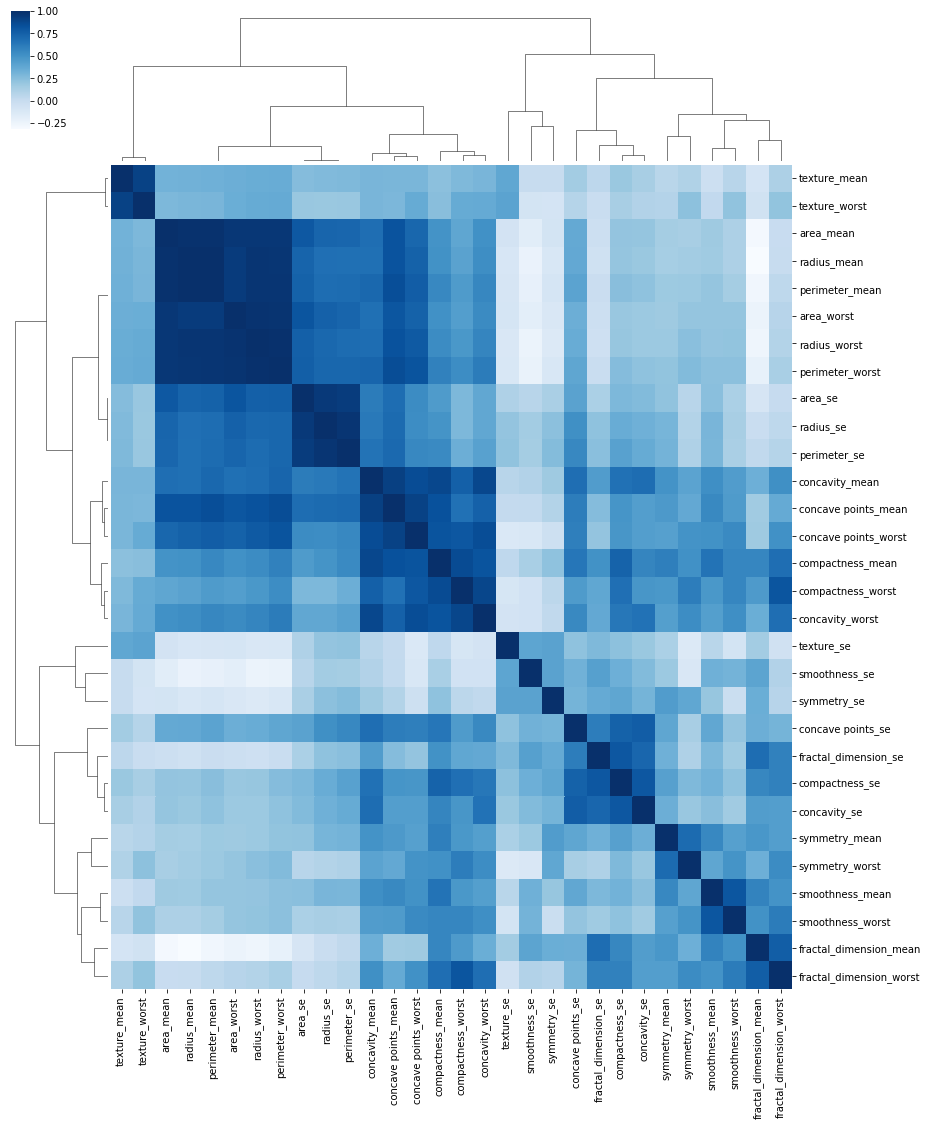

In [18]:
# Display a Seaborn cluster map of highly correlated values. 
sns.clustermap(df.corr(), metric="correlation", figsize=(14, 18), cmap="Blues");

The dark cells areas of the heatmap highlight features that are highly correlated, where as lightly  shaded cells indicates  pairs of features that are uncorrelated. We now have a very good sense of the data set and we can move to the date of preparation phase where we will clean up and modify the data set, so that we can build a machine learning model that can predict whether new cases are benign or malignant. 

### Data Preparation
In the preparation phase will construct the final data set that will be used to build a machine learning model. We will ensure that we have removed  unnecessary features, scale all features to a standard range of values, highlights those features that are most relevant and partition the data into a training set and a test set. 
In the Data Understanding phase of CRISP-DM we have already dropped the ID and Unnamed 32 columns. We should  now  separate the datasets into input features and target output  datasets.  The input features will be used as  training input into the machine learning model and the output of the model will be compared with the target  oiutput.  Recall that  are business requirements for this project are to be able to classify  patient samples as out of benign or malignant based on visual cell features, such as mean area, radius, perimeter etc..  So for this project we will be using floating points features of the training set as input and the diagnosis field as the target output.

In [19]:
# Create input dataset using the numerical features from the original dataset'
input_features = df.values[:,1:]
# Create the taget output from the 
target_output = df.values[:,0]

We can see the range of values  for some of the input features by producing the plot  shown below,  which shows us that the range of values for area (red line)  are much greater than the others. 

C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


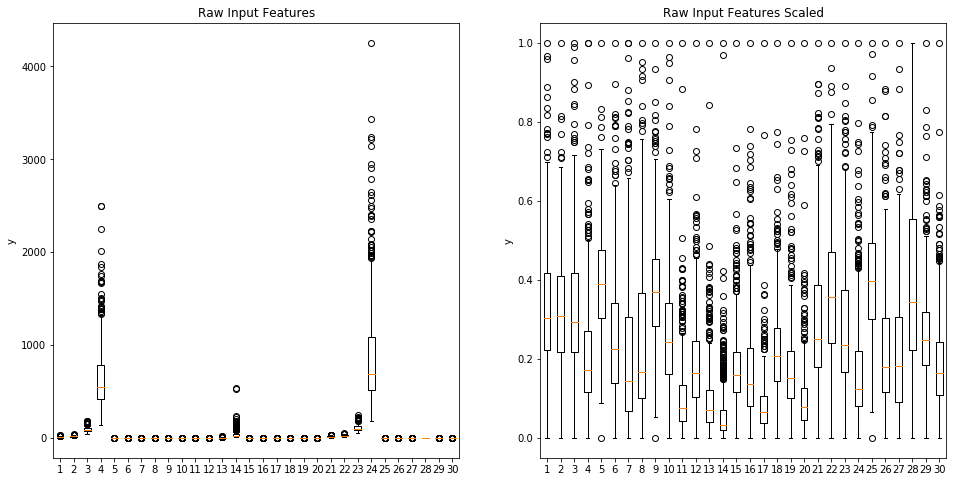

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

plt.boxplot(input_features)
plt.title('Raw Input Features')
plt.ylabel('y')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
input_features_scaled = scaler.fit_transform(input_features)

plt.subplot(1, 2, 2)
plt.boxplot(input_features_scaled)
plt.title('Raw Input Features Scaled')
plt.ylabel('y')

plt.show();

What is striking in a second box plot is that there seems to be a number of features that have extreme outliers. 
Next we will partition the data set into a training set and a test set. The training set will be used to build the machine learning model is important to make sure that the model has not been over fitted to the data and that the resulting model is capable of generalizing over unseen data. It is for this reason that a portion of the dataset is held back from the training phase of the model construction and is used at a later phase to test the machine learning model.

A validation dataset can also be used when training the model to evaluate it's performance.


In [25]:
#https://www.kaggle.com/georgiost77/breast-cancer-machine-learning-prediction 
from sklearn.model_selection import train_test_split

training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features, target_output,
                                                                            test_size=0.2, random_state=905)


In [26]:
categories, training_category_counts = np.unique(training_set_output, return_counts=True)
print("Training Set:")
print(categories)
print(training_category_counts)
categories, test_category_counts = np.unique(test_set_output, return_counts=True)
print("Test Set:")
print(categories)
print(test_category_counts)


Training Set:
['B' 'M']
[292 163]
Test Set:
['B' 'M']
[65 49]


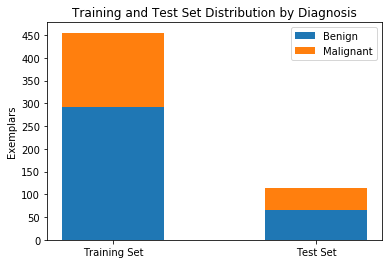

In [27]:
# We will need to reorganise the data tfor stacked bar plots
#plt.figure(figsize=(12, 10))
bar_plot_data = np.column_stack((training_category_counts, test_category_counts))
x_axis_ticks = np.arange(2)
bar_width = 0.5
p1 = plt.bar(x_axis_ticks, bar_plot_data[0], bar_width )
p2 = plt.bar(x_axis_ticks, bar_plot_data[1], bar_width, bottom=bar_plot_data[0])
plt.ylabel('Exemplars')
plt.title('Training and Test Set Distribution by Diagnosis')
plt.xticks(x_axis_ticks, ('Training Set', 'Test Set') )
plt.yticks(np.arange(0, 500, 50))
plt.legend((p1[0], p2[0]), ('Benign', 'Malignant'))
plt.show();

### Modeling

Here we use a Support vector machines to build a machine learning model for the Wisconsin breast cancer dataset, using a portion of the data (80%) for training and the rest for testing the model (20%). 
A Support Vector Machine is a supervised learning algorithm that has been shown to have good performance as a classifier (Cortes 1995). The SVM Algorithm iterates over a set of labeled training samples, which in our case are entries from the Wisconsin breast cancer dataset, which are labelled as either benign or malignant. A good way to explain the operation of machine learning is to use a two-dimensional input feature space as this allows us to more easily visualise the decision boundary that the algorithm produces. Figure X  shows a sample of data points, plotted with the radius feature on the x-axis and the texture feature on the y-axis. An SVM algorithm finds a hyperplane that produces an optimal decision boundary by finding data points, known as support vectors  that maximise the separation between classes. 
In order to gauge the performance of the classifier an F1 score is computed, which  is a useful measure of the level of precision and recall in a machine learning system (Powers 2011). Precision is the portion of instances among the classified instances that are relevant, while recall or sensitivity is the fraction of correctly classified relevant instances that have been retrieved over the total amount of relevant instances. An algorithm with high precision over a data set will return more relevant results than irrelevant ones. For cancer diagnosis this is critical as false positive and in particular false negative errors should be avoided.  An algorithm with high recall will classify most of the relevant data correctly.

[See explaination : https://pythonprogramming.net/support-vector-machine-intro-machine-learning-tutorial/ ]

There is usually a trade-off between precision and recall it is possible to have an algorithm with high precision  but low recall and vice versa.  For example the algorithm may be precise  by correctly classifying a subset of malignant breast cancer cases, however if it could achieve this by being  stringent in its  classification and could exclude many other malignant cases, which would give it a low recall.
The balance between precision and recall can be captured using an F1 score which is the harmonic average of the precision and recall scores,  where a score of 1 indicates perfect precision and recall.

We partition the breast cancer dataset into training and a test sets. The machine learning model is trained using the training set. This should be done in such a way that the algorithm does not overfit the data, which occurs when the algorithm fits a decision boundary tightly to all of the data, including any errors in the training data, so that it performs poorly on any unseen input. To avoid overfitting a test data set is held back and is used as the final unbiased measure of the algorithms performance on the training data. An model that produces a high score on the training set but a low score on the test set will have overfit the data, while a model that  produces a high score on the training set and a high score on the test set should provide good classifications. A model that underfits, by failing to find any useful decision boundary will perform poorly on both data sets i
The simulation in figure x shows the F1 scores for the algorithm on the training set and the test set,  thereby allowing users to  gauge the performance of the algorithm.  This also challenges the user to try to find optimal parameters what a machine learning algorithm and will enhance their understanding of the dynamics of the problem. 
In this case the hyperplane is  a linear separation as we are dealing with a two dimensional feature space. Figure X (a)  shows how a linear separation trying to find the ideal separation, however the relationship between these two features in the data set is highly nonlinear so it would not be possible to get clear linear separation. SVMs use a technique known as the kernel trick which maps data points to a higher dimensional space where a linear separation may be found (Boser 1992).  The use of a nonlinear kernel is shown in fig x (b).  The choice of using a kernel is an important machine learning hyperparameter, practitioners  needs to consider if the data set is linearly separable or not.  
Choosing a non-linear kernel for a linear data set will tend to cause the model to over fit the data, which will reduce its ability to generalise as indicated by a poor performance on the test data set F1 score.


Figure X (a) An illustration of the performance of a SVM on the Radius and Texture features of the WBCD using a linear model.
Figure 1  An illustration of the performance of a SVM on the Radius and Texture features of the WBCD using a non-linear kernel.
 
A support vector machine can be tuned via a cost function denoted C, which penalises the algorithm for points that fall within the margin. A small value of C, imposes a low penalty for  misclassification, thereby allowing a "soft margin", which promotes better generalisation at the risk of lower precision. A large value of C imposes a  high cost of misclassification, thereby producing a “hard margin", which promotes higher precision but poorer generalisation and recall. The JavaScript framework (Karpathy 2018) allows users to modify the cost function C, and are challenged to find a balance that maximises the F1 score.

For non-linear kernel the Karpathy SVM  JavaScript framework uses a Gaussian radial basis function non-linear kernel, which allows the SVM algorithm to fit the maximum margin separating hyperplane in a transformed input feature space. The radial  radial basis function k is defined as:

Figure X: Gaussian radial basis functions in one input dimension (wikipedia)

The parameter sigma determines the influence that feature vectors have on the kernel mapping. Intuitively, low values of sigma narrow the region of influence of the kernel for vectors in the feature space, which can cause the SVM to overfit the data figure X (b). High values of sigma widen the region of influence, making the algorithm better at generalising at the expense of losing precision, see figure X (b). 

Figure X (a) 

Figure X (b)
Figure X Gaussian radial basis function non-linear kernel with sigma = 0.4, causing overfitting (a) and with sigma = 2.0, improving generalisation with some loss of precision.


In [49]:
from sklearn.svm import SVC
#https://www.kaggle.com/georgiost77/breast-cancer-machine-learning-prediction 
from sklearn.model_selection import train_test_split

training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features, target_output,
                                                                            test_size=0.2, random_state=905)
svm= SVC()
svm.fit(training_set_input, training_set_output)

print('acc on train dataset: {:.3f}'.format(svm.score(training_set_input,training_set_output)))
print('acc on test dataset: {:.3f}'.format(svm.score(test_set_input,test_set_output)))

acc on train dataset: 1.000
acc on test dataset: 0.570


In [50]:
#https://www.kaggle.com/georgiost77/breast-cancer-machine-learning-prediction 
from sklearn.model_selection import train_test_split

training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features_scaled, target_output,
                                                                            test_size=0.2, random_state=905)
svm= SVC()
svm.fit(training_set_input, training_set_output)

print('acc on train dataset: {:.3f}'.format(svm.score(training_set_input,training_set_output)))
print('acc on test dataset: {:.3f}'.format(svm.score(test_set_input,test_set_output)))

acc on train dataset: 0.949
acc on test dataset: 0.947


In [51]:
svm.predict(test_set_input)

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B'], dtype=object)

In [53]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)


# Split the dataset in two equal parts
training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features_scaled, target_output,
                                                                            test_size=0.2, random_state=905)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(training_set_input, training_set_output)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test_set_output, clf.predict(test_set_input)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\m

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.321 (+/-0.003) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.321 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.934 (+/-0.033) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.321 (+/-0.003) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.028) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.934 (+/-0.033) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.977 (+/-0.030) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.028) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976 (+/-0.027) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.034) for {'C': 10, 'kernel': 'linear'}
0.958 (+/-0.036) for {'C': 100, 'kernel': 'linear'}
0.951 (+/-0.043) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

### Analysis of Confusion Matrix
**True positive (TP)** also known as hit

**True negative (TN)** also known as correct rejection

**False positive (FP)** also known as with __[false alarm](https://en.wikipedia.org/wiki/False_alarm)__ __[Type I error](https://en.wikipedia.org/wiki/Type_I_error)__

**False negative (FN)** also known as __[Type II error](https://en.wikipedia.org/wiki/Type_II_error)__

**Sensitivity, recall, hit rate, or true positive rate (TPR)**
Correctly identifying malignant cases as malignant.
\begin{align}
    {TPR} ={\frac {\mathrm {TP} }{P}}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}
\end{align}	

**Specificity, selectivity or true negative rate (TNR)**
\begin{align}
    {TNR} ={\frac {\mathrm {TN} }{N}}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} 
\end{align}	

**Precision or positive predictive value (PPV)**
\begin{align}
{NPV} ={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FN} }}
\end{align}	


In [56]:
# Neural Network
from sklearn.neural_network import MLPClassifier       #Neural Network

# Split the dataset in two equal parts
training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features_scaled, target_output,
                                                                            test_size=0.2, random_state=905)


mlp = MLPClassifier(random_state=42)
mlp.fit(training_set_input, training_set_output)

print('acc for training data: {:.3f}'.format(mlp.score(training_set_input, training_set_output)))
print('acc for test data: {:.3f}'.format(mlp.score(test_set_input, test_set_output)))

acc for training data: 0.980
acc for test data: 0.965
